SMOTE, dengesiz veri setlerindeki azınlık sınıfını artırarak sınıflar arasındaki dengesizliği gidermeye
yardımcı olan bir oversampling (aşırı örnekleme) yöntemidir.Dengesiz veri kümelerinde, azınlık sınıfı (örneğin, "1" etiketi) çok az olduğu için makine öğrenmesi modelleri genellikle çoğunluk sınıfını ("0") öğrenir ve azınlık sınıfını görmezden gelir. Bu durum, tahminlerin yanlış olmasına yol açabilir.
Adımları:
Azınlık sınıfındaki verileri alır (örneğin, failure=1 olanları).
Bu veriler arasındaki en yakın komşuları (K-Nearest Neighbors) hesaplar.
Yeni veriler oluşturur:
Gerçek veriler arasına, komşuları kullanarak interpolasyon (ara değerler) ile yeni sentetik örnekler ekler.
Yeni veri seti oluşturulur: Azınlık sınıfı çoğaltılmış olur.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('failure.csv')

In [4]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [8]:
print(df["failure"].value_counts())


failure
0    124388
1       106
Name: count, dtype: int64


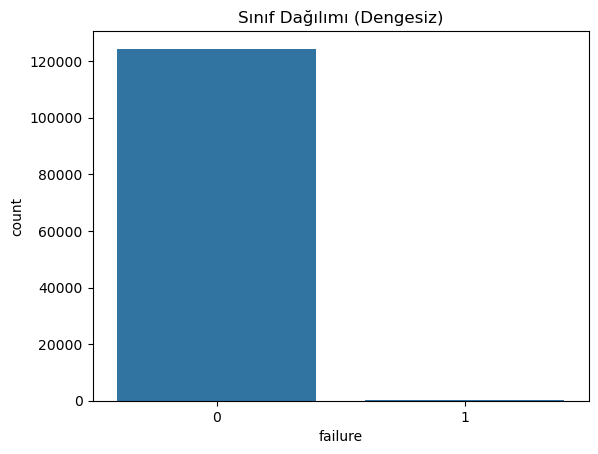

In [9]:
sns.countplot(x=df["failure"])
plt.title("Sınıf Dağılımı (Dengesiz)")
plt.show()


In [7]:
etiket = df["failure"]  #hedef değişken
df_nitelikler = df.drop(columns=["failure", "date", "device"])  #gereksiz sütunlar


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.drop(columns=["failure", "date", "device"])  
y = df["failure"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    df_nitelikler, etiket, test_size=0.2, random_state=42, stratify=etiket
)#eğitim ve test 

In [18]:
pip install imbalanced-learn

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE(random_state=42)#veri dengesini sağlamak için
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [21]:
print(pd.Series(y_train_resampled).value_counts())#yeni dağılım

failure
0    99510
1    99510
Name: count, dtype: int64


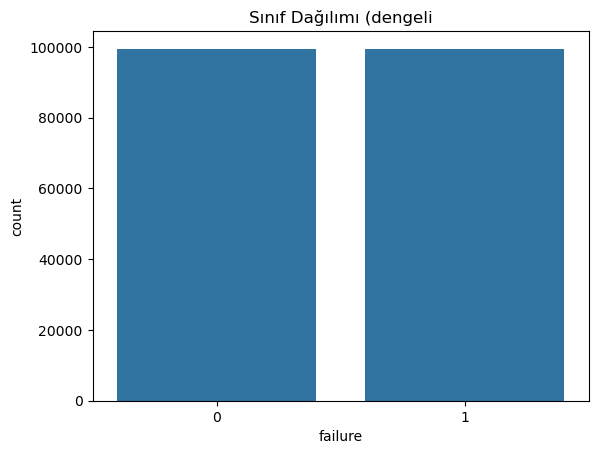

In [22]:
sns.countplot(x=y_train_resampled)
plt.title("Sınıf Dağılımı (dengeli")
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train_resampled, y_train_resampled)
#randomforest modeli eğitme

RandomForestClassifier(random_state=42)

In [30]:
#XGBoost – Büyük ve dengesiz veri setlerinde güçlü bir algoritma
from xgboost import XGBClassifier
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(x_train_resampled, y_train_resampled)

C:\Users\akbab\.anaconda\anacon\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:03:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred = clf.predict(x_test)#tahmin

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24878
           1       0.03      0.14      0.04        21

    accuracy                           0.99     24899
   macro avg       0.51      0.57      0.52     24899
weighted avg       1.00      0.99      1.00     24899



In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

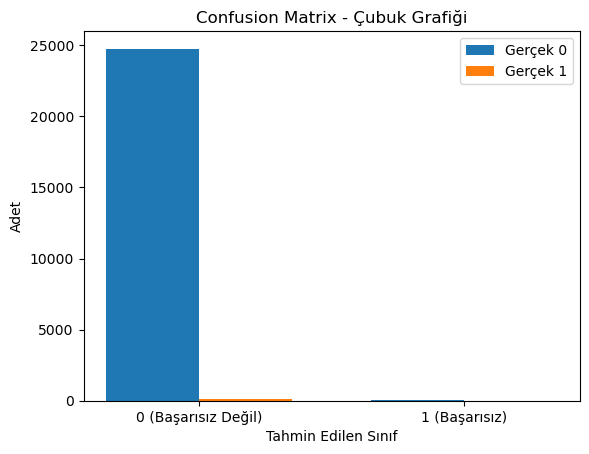

In [48]:
cm = confusion_matrix(y_test, y_pred)
classes = ["0 (Başarısız Değil)", "1 (Başarısız)"]
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(classes))
ax.bar(index, cm[:, 0], bar_width, label="Gerçek 0")
ax.bar(index + bar_width, cm[:, 1], bar_width, label="Gerçek 1")
ax.set_xlabel("Tahmin Edilen Sınıf")
ax.set_ylabel("Adet")
ax.set_title("Confusion Matrix - Çubuk Grafiği")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()
plt.show()